In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#my code
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM 
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/ASHOKLEY.NS?period1=1590029326&period2=1621565326&interval=1d&events=history&includeAdjustedClose=true")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-21,43.349998,46.500000,43.049999,46.099998,46.099998,42517927.0
1,2020-05-22,45.650002,45.799999,43.400002,43.599998,43.599998,29579130.0
2,2020-05-26,44.000000,44.549999,43.099998,43.549999,43.549999,25975086.0
3,2020-05-27,43.799999,44.099998,43.000000,43.200001,43.200001,30177711.0
4,2020-05-28,43.700001,44.750000,43.200001,44.400002,44.400002,40119059.0
...,...,...,...,...,...,...,...
245,2021-05-14,114.000000,114.500000,111.400002,112.099998,112.099998,15520833.0
246,2021-05-17,113.150002,116.000000,111.650002,115.400002,115.400002,16864773.0
247,2021-05-18,117.000000,123.449997,116.500000,122.949997,122.949997,48225487.0
248,2021-05-19,123.300003,125.349998,120.300003,124.800003,124.800003,35836557.0


In [5]:
df1=df.dropna()
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-21,43.349998,46.500000,43.049999,46.099998,46.099998,42517927.0
1,2020-05-22,45.650002,45.799999,43.400002,43.599998,43.599998,29579130.0
2,2020-05-26,44.000000,44.549999,43.099998,43.549999,43.549999,25975086.0
3,2020-05-27,43.799999,44.099998,43.000000,43.200001,43.200001,30177711.0
4,2020-05-28,43.700001,44.750000,43.200001,44.400002,44.400002,40119059.0
...,...,...,...,...,...,...,...
245,2021-05-14,114.000000,114.500000,111.400002,112.099998,112.099998,15520833.0
246,2021-05-17,113.150002,116.000000,111.650002,115.400002,115.400002,16864773.0
247,2021-05-18,117.000000,123.449997,116.500000,122.949997,122.949997,48225487.0
248,2021-05-19,123.300003,125.349998,120.300003,124.800003,124.800003,35836557.0


In [7]:
df1["Date"]=pd.to_datetime(df1.Date,format="%Y-%m-%d")
df1.index=df1['Date']

<ipython-input-7-11cbdff1b3e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Date"]=pd.to_datetime(df1.Date,format="%Y-%m-%d")


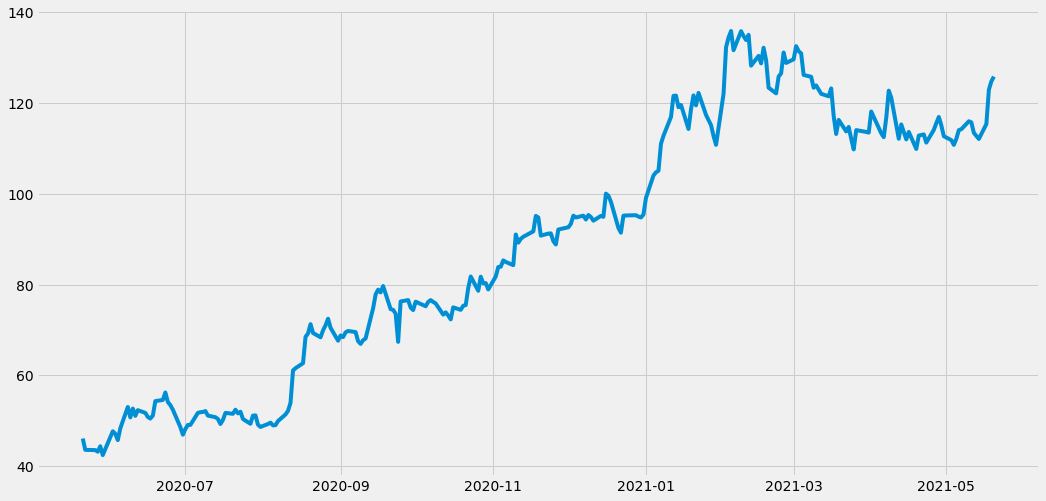

In [8]:
plt.figure(figsize=(16,8))
plt.plot(df1["Close"],label='Close Price history')

In [9]:
import datetime as dt

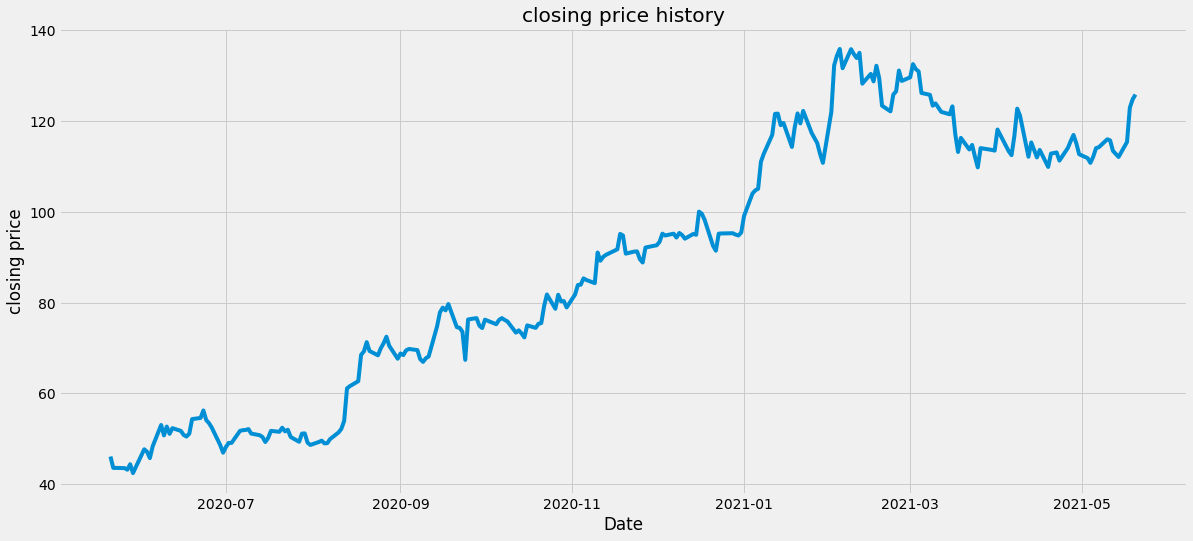

In [10]:
#visualize te closing price
plt.figure(figsize=(18,8))
plt.title('closing price history')
plt.plot(df1['Close'])
plt.xlabel('Date')
plt.ylabel('closing price')
plt.show()

In [13]:
#create ne dataframe with only close column
data=df1.filter(['Close'])
data

,Close
Date,
2020-05-21,46.099998
2020-05-22,43.599998
2020-05-26,43.549999
2020-05-27,43.200001
2020-05-28,44.400002
...,...
2021-05-14,112.099998
2021-05-17,115.400002
2021-05-18,122.949997


In [14]:
#convert dataframe into numpy array
dataset=data.values
dataset

array([[ 46.099998],
       [ 43.599998],
       [ 43.549999],
       [ 43.200001],
       [ 44.400002],
       [ 42.450001],
       [ 46.400002],
       [ 47.700001],
       [ 47.150002],
       [ 45.75    ],
       [ 48.349998],
       [ 53.049999],
       [ 50.75    ],
       [ 52.700001],
       [ 51.099998],
       [ 52.349998],
       [ 51.75    ],
       [ 50.849998],
       [ 50.5     ],
       [ 51.150002],
       [ 54.349998],
       [ 54.599998],
       [ 56.25    ],
       [ 54.150002],
       [ 53.450001],
       [ 52.450001],
       [ 48.599998],
       [ 46.950001],
       [ 48.200001],
       [ 49.099998],
       [ 49.099998],
       [ 51.75    ],
       [ 51.900002],
       [ 51.950001],
       [ 52.150002],
       [ 51.150002],
       [ 50.799999],
       [ 50.400002],
       [ 49.299999],
       [ 50.200001],
       [ 51.75    ],
       [ 51.549999],
       [ 52.450001],
       [ 51.650002],
       [ 52.      ],
       [ 50.400002],
       [ 49.349998],
       [ 51.1

In [15]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data


array([[0.03905829],
       [0.01230601],
       [0.01177098],
       [0.00802568],
       [0.02086679],
       [0.        ],
       [0.04226861],
       [0.05617978],
       [0.05029429],
       [0.03531299],
       [0.06313534],
       [0.11342963],
       [0.08881755],
       [0.10968433],
       [0.09256284],
       [0.10593898],
       [0.09951846],
       [0.08988762],
       [0.08614232],
       [0.09309793],
       [0.1273408 ],
       [0.13001603],
       [0.14767255],
       [0.12520066],
       [0.11771001],
       [0.1070091 ],
       [0.06581057],
       [0.0481541 ],
       [0.06153023],
       [0.07116102],
       [0.07116102],
       [0.09951846],
       [0.10112361],
       [0.10165865],
       [0.10379884],
       [0.09309793],
       [0.08935258],
       [0.08507225],
       [0.07330121],
       [0.08293206],
       [0.09951846],
       [0.09737826],
       [0.1070091 ],
       [0.09844839],
       [0.10219368],
       [0.08507225],
       [0.07383625],
       [0.093

In [17]:
#get the number of rows to train te model
training_data_len=math.ceil(len(dataset)*.8)
training_data_len
#to train e take 80 prcent 

200

In [18]:
#create te training dataset
#create the scaled traing dataset
train_data=scaled_data[0:training_data_len,:]
#split the data into x_train and y_train datasets
x_train=[]     #independant training variables or training features
y_train=[]     #depndant variabls or target variables

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])     #pass 60 valus    position 0->59
    y_train.append(train_data[i,0])      #contain 61 value in position 60th
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.03905829, 0.01230601, 0.01177098, 0.00802568, 0.02086679,
       0.        , 0.04226861, 0.05617978, 0.05029429, 0.03531299,
       0.06313534, 0.11342963, 0.08881755, 0.10968433, 0.09256284,
       0.10593898, 0.09951846, 0.08988762, 0.08614232, 0.09309793,
       0.1273408 , 0.13001603, 0.14767255, 0.12520066, 0.11771001,
       0.1070091 , 0.06581057, 0.0481541 , 0.06153023, 0.07116102,
       0.07116102, 0.09951846, 0.10112361, 0.10165865, 0.10379884,
       0.09309793, 0.08935258, 0.08507225, 0.07330121, 0.08293206,
       0.09951846, 0.09737826, 0.1070091 , 0.09844839, 0.10219368,
       0.08507225, 0.07383625, 0.09309793, 0.09363297, 0.07169611,
       0.06634566, 0.07330121, 0.07651148, 0.07009095, 0.07062599,
       0.08025683, 0.09577316, 0.10433388, 0.12306047, 0.19957195])]
[0.20492240165282838]



In [19]:
#convrt x_train and y_train to numpy array so can use them to lstm model
x_train,y_train=np.array(x_train),np.array(y_train)
x_train,y_train

(array([[0.03905829, 0.01230601, 0.01177098, ..., 0.10433388, 0.12306047,
         0.19957195],
        [0.01230601, 0.01177098, 0.00802568, ..., 0.12306047, 0.19957195,
         0.2049224 ],
        [0.01177098, 0.00802568, 0.02086679, ..., 0.19957195, 0.2049224 ,
         0.21669344],
        ...,
        [0.56019268, 0.56447298, 0.55537722, ..., 0.94917068, 0.92455871,
         0.93311931],
        [0.56447298, 0.55537722, 0.56607813, ..., 0.92455871, 0.93311931,
         0.96415205],
        [0.55537722, 0.56607813, 0.56126276, ..., 0.93311931, 0.96415205,
         0.95238098]]),
 array([0.2049224 , 0.21669344, 0.2787587 , 0.28678439, 0.30872129,
        0.28785446, 0.27768864, 0.29427499, 0.30604606, 0.32156235,
        0.30016053, 0.26966295, 0.28196901, 0.27822363, 0.28945962,
        0.29266992, 0.28999469, 0.26859287, 0.26217226, 0.27073302,
        0.27501341, 0.34617447, 0.3788122 , 0.39004819, 0.38362766,
        0.39860887, 0.34403424, 0.34242909, 0.33333333, 0.26698772,
 

In [20]:
#reshape te data.... y?lstm model expct the input in 3d form of samples 
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(140, 60, 1)

In [21]:
#build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [22]:
#compile th model
model.compile(optimizer='adam',loss='mean_squared_error')

In [23]:
model.add(Dense(units = 1))

In [24]:
#train te model
model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
140/140 [==============================] - 34s 32ms/step - loss: 0.0292 0s - loss: 0.0
Epoch 2/10
140/140 [==============================] - 5s 33ms/step - loss: 0.0055
Epoch 3/10
140/140 [==============================] - 5s 32ms/step - loss: 0.0037
Epoch 4/10
140/140 [==============================] - 4s 31ms/step - loss: 0.0038
Epoch 5/10
140/140 [==============================] - 5s 33ms/step - loss: 0.0037
Epoch 6/10
140/140 [==============================] - 5s 33ms/step - loss: 0.0031
Epoch 7/10
140/140 [==============================] - 5s 36ms/step - loss: 0.0034
Epoch 8/10
140/140 [==============================] - 5s 34ms/step - loss: 0.0030
Epoch 9/10
140/140 [==============================] - 5s 35ms/step - loss: 0.0034
Epoch 10/10
140/140 [==============================] - 5s 34ms/step - loss: 0.0028


In [28]:
#create testing dataset
#create a new array containing scaled values from indx 3568 to 5182
test_data=scaled_data[training_data_len - 60:,:]
#create dataset x_test and y_tst
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
test_data

array([[0.56607813],
       [0.56126276],
       [0.55270199],
       [0.56393799],
       [0.56179775],
       [0.61637246],
       [0.611557  ],
       [0.59711079],
       [0.53558055],
       [0.52434457],
       [0.56447298],
       [0.56500806],
       [0.56554313],
       [0.56233283],
       [0.56019268],
       [0.56714821],
       [0.60620654],
       [0.6591761 ],
       [0.66666671],
       [0.670412  ],
       [0.73408247],
       [0.75280907],
       [0.79721778],
       [0.84697702],
       [0.84751211],
       [0.82022475],
       [0.8255752 ],
       [0.76886043],
       [0.81540938],
       [0.8480471 ],
       [0.82450513],
       [0.85393264],
       [0.80203324],
       [0.7779562 ],
       [0.75227399],
       [0.73140725],
       [0.85179249],
       [0.96147682],
       [0.98448371],
       [1.        ],
       [0.95452113],
       [0.99946508],
       [0.98769402],
       [0.97859818],
       [0.99090432],
       [0.9181381 ],
       [0.94114499],
       [0.923

In [29]:
#convert data into numpy array
x_test=np.array(x_test)

In [30]:
x_test

array([[0.56607813, 0.56126276, 0.55270199, ..., 0.96415205, 0.95238098,
        0.94703053],
       [0.56126276, 0.55270199, 0.56393799, ..., 0.95238098, 0.94703053,
        0.8962012 ],
       [0.55270199, 0.56393799, 0.56179775, ..., 0.94703053, 0.8962012 ,
        0.8919209 ],
       ...,
       [0.94114499, 0.92348855, 0.96040666, ..., 0.75976459, 0.74531838,
        0.78063142],
       [0.92348855, 0.96040666, 0.93097916, ..., 0.74531838, 0.78063142,
        0.86142324],
       [0.96040666, 0.93097916, 0.86623871, ..., 0.78063142, 0.86142324,
        0.88121999]])

In [32]:
#reshap the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(49, 60, 1)

In [34]:
predictions = model.predict(x_test)

In [35]:
predictions = scaler.inverse_transform(predictions)
predictions

array([[137.2879  ],
       [136.28786 ],
       [135.16617 ],
       [133.77266 ],
       [132.79396 ],
       [131.77502 ],
       [130.90312 ],
       [130.67    ],
       [129.33649 ],
       [127.227455],
       [126.08589 ],
       [124.90434 ],
       [124.21261 ],
       [123.24119 ],
       [121.919586],
       [121.685974],
       [121.66522 ],
       [121.64808 ],
       [122.58182 ],
       [122.468216],
       [121.90305 ],
       [122.210945],
       [123.918274],
       [125.21897 ],
       [124.138016],
       [123.373825],
       [122.14137 ],
       [121.45318 ],
       [120.28711 ],
       [119.91989 ],
       [119.90103 ],
       [119.60953 ],
       [119.90673 ],
       [120.58924 ],
       [121.487045],
       [121.81515 ],
       [121.39224 ],
       [120.68251 ],
       [119.83843 ],
       [119.44769 ],
       [119.671524],
       [120.050575],
       [120.752914],
       [121.30908 ],
       [121.19733 ],
       [120.64665 ],
       [120.80516 ],
       [122.7

<ipython-input-37-3f5ee53d5df5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']=predictions


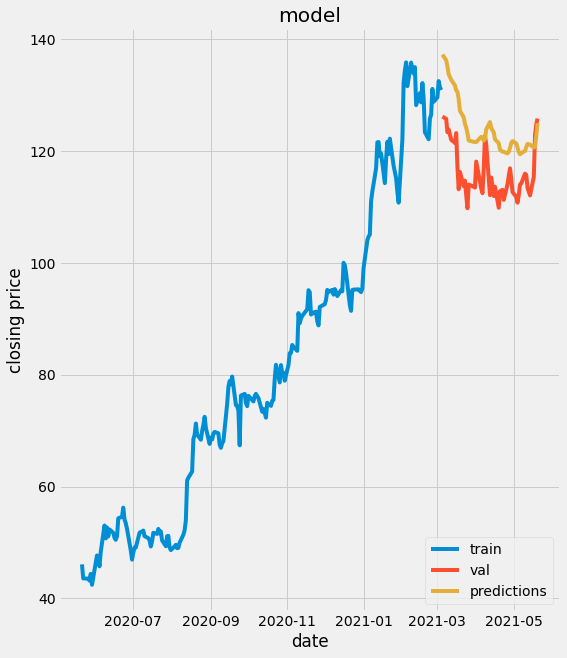

In [37]:
'''plt.figure(figsize=(10,6))
plt.plot(dataset, color='blue', label='Actual Stock Price')
plt.plot(predictions , color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
'''
#plot te data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions
#visualiz te data
plt.figure(figsize=(8,10))
plt.title('model')
plt.xlabel('date')
plt.ylabel('closing price')
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','val','predictions'],loc='lower right')
plt.show()